# Assignment 5

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Runtime→→Restart runtime) and then run all cells (in the menubar, select Runtime→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [1]:
NAME = "James Pretti"
STUDENT_ID = "1676114"

## Question 1: GRU/LSTM

We've seen both LSTM and GRU cells as building blocks for RNNs.

Here is a reminder of each of their corresponding architectures:

![Pic](https://drive.google.com/uc?id=1INZQkDev_8rdFxOT9hfAiPWJRT6-N82S)

### Question 1.i) What are the major differences between each?


An LSTM operates by using input, forget, and output gates. A GRU operates by using a reset gate and an update gate. The LSTM unit has separate input and forget gate vs the GRU which performs both of these operations together with a reset gate. LSTM is more accurate on datasets using longer sequences. GRU uses less training parameters and therefore require less memory. They also usually execute faster and train faster.


### Question 1.ii) What are the major advantages of each?

Both an LSTM and GRU can keep memory/state from previous activations instead of just replacing everything similar to a vanilla RNN. This allows both the LSTM and GRU to remember features for however long it needs to. It also alows them to use backpropagation to reduce vanishing gradient. LSTM is more accurate on datasets using longer sequences. GRU uses less training parameters and therefore require less memory. They also usually execute faster and train faster. 

### Question 1.iii) What are the major disadvantages of each?

LSTMs are more complex and have more Operating Cost. They also execute slower and train slower. They also require more memory. GRUs are usually less accurate than LSTMs. 

## Question 2: United States Corona Virus Cases Forecast

### Question 2.i) Import data and get data for United States
We will be using a subset of Corona Virus dataset available at [Kaggle.com](https://www.kaggle.com/). The dataset is rather comprehensive so for our predictions we will use the number of cases in the United States from the 1 January 2020 (when this record starts) to 14 July 2020 (the last time this dataset was updated). The numbers of cases is cumulative. \\

You may want to switch to GPU in "Runtime"->"Change Runtime type" for this assignment.

** Note: The full data set is available at https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset?select=time_series_covid_19_confirmed_US.csv

In [2]:
# Import and get data
import numpy as np
import pandas as pd
!wget "https://people.ucsc.edu/~mbriden/cse140/time_series_covid_19_confirmed.csv"

--2020-07-25 18:33:29--  https://people.ucsc.edu/~mbriden/cse140/time_series_covid_19_confirmed.csv
Resolving people.ucsc.edu (people.ucsc.edu)... 128.114.119.88
Connecting to people.ucsc.edu (people.ucsc.edu)|128.114.119.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178638 (174K) [text/csv]
Saving to: ‘time_series_covid_19_confirmed.csv.12’

time_series_covid_1 100%[===================>] 174.45K   399KB/s    in 0.4s    

2020-07-25 18:33:30 (399 KB/s) - ‘time_series_covid_19_confirmed.csv.12’ saved [178638/178638]



In [3]:
# Load data
dataframe = pd.read_csv("time_series_covid_19_confirmed.csv")

Let's look at the data

In [4]:
dataframe.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,858,861
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267,276,284,291,315,328,346,346,346,386,386,396,458,462,506,525,541


This data set is somewhat scattered. Some of rows represent an entire country's case data while some country's case data is split up into province. But we want to extract US case data.

In [5]:
# Extract US corona data and drop province/state - Long.
US_dataframe = dataframe[dataframe['Country/Region'] == 'US']
US_dataframe.head()
US_dataframe = US_dataframe.drop(['Province/State','Country/Region','Lat','Long'], axis=1)

In [6]:
US_dataframe.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
225,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,15,15,15,16,16,24,30,...,1903904,1926636,1944367,1961781,1979908,2000702,2023652,2048986,2074542,2094366,2114026,2137731,2163290,2191099,2222579,2255327,2281766,2312302,2347491,2382426,2422299,2467554,2510259,2549294,2590668,2636414,2687588,2742049,2795361,2841241,2891124,2936077,2996098,3054699,3117946,3184573,3245925,3304942,3364157,3431574


Now we have a case dataframe containing the US case numbers ranging from 22 January 2020 to 14 July 2020. However, lets only consider the data from 2 March 2020 when the total number of Corona virus cases in the US exceeded 50,000.

In [7]:
# Cut off first 40 days of data
US_dataframe = US_dataframe.iloc[:, 40:]
US_dataframe.shape

(1, 135)

#### Question 2.i.a) Plot the cases for the US 
Using seaborn.linepolot, Plot the cases in the US in a Number of Cases vs. Day plot.
**Hint: you may need np.linspace to create an x-axis. You will also need to cast US_dataframe into an np.array using US_dataframe.values. You will likely need to call reshape ino order to transform the new np.array into shape (135,)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


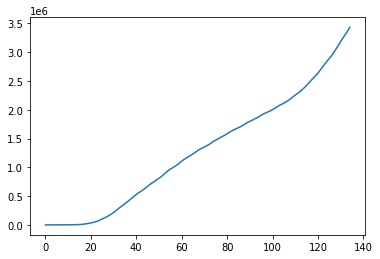

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# YOUR CODE HERE
array = US_dataframe.values
newarray = array.reshape(135,)
xaxis = np.linspace(1,135, num=135)
sns.lineplot(data=newarray)

#### Question 2.i.b) Analyzing the plot
If you plotted the data correctly, it looks like there are some slight trends in the plot. Recalling that the data starts on 22nd of January, describe some of the trends that you may see. When did cases start to raise dramatically? Did the total number of cases ever seem to stop growing? Add approximate dates.

The data that was plotted actually starts on March 2, 2020 (0 on the graph x axis) per the instructions in 2.i.a (not on January 22 like the question suggests). The first 20 days, between March 2 and March 22, the total number of cases appeared to flatten. However around March 22, the rate of infections began to increase with the total number of infected at 1 million by about May 2nd. The rate of infections seemed to slow down a bit between June 1st and July 1st, however after this point it seems as if the rate of infection increased to its highest rate yet. It makes sense that the rate of infections would be exponential as the number of infected increase, there is a higher chance of additional peoplee getting infected.  

### Question 2.ii) Analyzing the plot
As an aside, disease spread often occur on an exponential scale. Therefore, we will analyze the data in the logarithmic scale. We'll apply the np.log function to the dataframe below then plot the transformed data.

In [9]:
# Apply natural log to the US_dataframe
df = US_dataframe.apply(np.log)

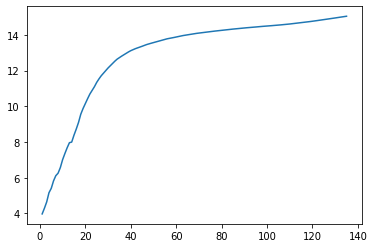

In [10]:
sns.lineplot(x = np.linspace(1,135,135), y = df.values.reshape(-1))

The plot above shows that on a logarithmic scale, the cumulative number of cases began to level off around days 20-30 but towards day 120 we see that the growth in the number of cases has begun to tick upwards again. Now we will do our time series prediction on the US_dataframe.

#### Question 2.iii.a) Apply MinMaxScaler to US_dataframe
Recall [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) from sklearn. Use it to scale the data for our analysis. 
** Hint: You will need to call .transpose inorder to comply with required inputshape (n,1)

In [11]:
# # YOUR CODE HERE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
US_data = np.transpose(US_dataframe)
US_data = scaler.fit_transform(US_data)
print(US_data)



[[0.00000000e+00]
 [5.82831928e-06]
 [1.48622142e-05]
 [3.52613316e-05]
 [4.92492979e-05]
 [8.27621338e-05]
 [1.15983554e-04]
 [1.35799839e-04]
 [1.91751704e-04]
 [3.07735258e-04]
 [4.39455274e-04]
 [6.13139188e-04]
 [8.20918770e-04]
 [8.49477535e-04]
 [1.25512856e-03]
 [1.77414039e-03]
 [2.58311110e-03]
 [4.11013076e-03]
 [5.66104652e-03]
 [7.51037222e-03]
 [9.82304931e-03]
 [1.27631450e-02]
 [1.57536556e-02]
 [1.92340365e-02]
 [2.44900148e-02]
 [2.97894141e-02]
 [3.55574103e-02]
 [4.11339461e-02]
 [4.73999722e-02]
 [5.49817413e-02]
 [6.24073115e-02]
 [7.12678139e-02]
 [8.05747655e-02]
 [9.02357876e-02]
 [9.83587161e-02]
 [1.06996868e-01]
 [1.15965777e-01]
 [1.25201915e-01]
 [1.35330368e-01]
 [1.45093094e-01]
 [1.53843150e-01]
 [1.62163950e-01]
 [1.69534151e-01]
 [1.77421324e-01]
 [1.85900363e-01]
 [1.95021100e-01]
 [2.04557396e-01]
 [2.12816416e-01]
 [2.20404305e-01]
 [2.28371909e-01]
 [2.35806513e-01]
 [2.44022694e-01]
 [2.53987663e-01]
 [2.64563440e-01]
 [2.74157145e-01]
 [2.822261

#### Question 2.iii.b) Split data into train and test for time series prediction
We will begin by splitting US_dataframe into train and test data. Begin with split = 0.7.

In [12]:
# Use this function to create train/test split
def train_test_split(arr: np.array, split = 0.80):
    train_size = int(len(arr) * split)
    test_size = len(arr) - train_size
    US_train, US_test = arr[0:train_size,:], arr[train_size:len(arr),:]
    print("train.shape: ", US_train.shape)
    print("test.shape: ", US_test.shape)
    return (US_train, US_test)

In [13]:
# Call train_test_split on US_data
# YOUR CODE HERE
train, test = train_test_split(US_data)

train.shape:  (108, 1)
test.shape:  (27, 1)


Now we create the dataset time_step determines how many days back the model will look to generate a new prediction. Begin with time_step=2

In [14]:
# Generate a dataset where X[n] contains the readings for the 'time_step' previous days 
# and y contains the reading for today.
def create_dataset(dataset, time_steps=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_steps-1):
		a = dataset[i:(i+time_steps), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_steps, 0])
	return np.array(dataX), np.array(dataY)

In [15]:
# Choose the number of time steps that the model "looks back"
# YOUR CODE HERE
time_steps = 4

# Create your training dataset.
# YOUR CODE HERE
X_train, y_train = create_dataset(train, time_steps)
## Create your test dataset.
# YOUR CODE HERE
X_test, y_test = create_dataset(test, time_steps)


#### Question 2.iii.c) LSTM Architecture
Next build the LSTM model. We don't have a lot of data so build the model with:
<ul>
<li>Input Layer shape of size (1,time_steps)</li>
<li>An LSTM Laywer with 10 units</li>
<li>Dense Layer with 1 neuron</li>

Then use 'mean_squared_error' loss with an optimizer. Run model.summary(), compile, then fit the model. Train for 100 epochs using X_train, y_train, validation_split = 0.2


In [16]:
# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


In [17]:
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error

# Build model architecture here
# YOUR CODE HERE
model = Sequential()
model.add(LSTM(10, input_shape=(1, time_steps)))
model.add(Dense(1))

# Compile model
# YOUR CODE HERE
model.compile(loss='mean_squared_error', optimizer='adam')

# Model summary
# YOUR CODE HERE
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                600       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 611
Trainable params: 611
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Fit model
# YOUR CODE HERE
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 82 samples, validate on 21 samples
Epoch 1/100
82/82 [==============================] - 1s 7ms/step - loss: 0.0755 - val_loss: 0.3378
Epoch 2/100
82/82 [==============================] - 0s 257us/step - loss: 0.0724 - val_loss: 0.3263
Epoch 3/100
82/82 [==============================] - 0s 253us/step - loss: 0.0692 - val_loss: 0.3148
Epoch 4/100
82/82 [==============================] - 0s 224us/step - loss: 0.0660 - val_loss: 0.3035
Epoch 5/100
82/82 [==============================] - 0s 278us/step - loss: 0.0630 - val_loss: 0.2924
Epoch 6/100
82/82 [==============================] - 0s 223us/step - loss: 0.0601 - val_loss: 0.2816
Epoch 7/100
82/82 [==============================] - 0s 223us/step - loss: 0.0570 - val_loss: 0.2712
Epoch 8/100
82/82 [==============================] - 0s 217us/step - loss: 0.0545 - val_loss: 0.2609
Epoch 9/100
82/82 [==============================] - 0s 319us/step - loss: 0.0518 - val_loss: 0.2509
Epoch 10/100
82/82 [=============================

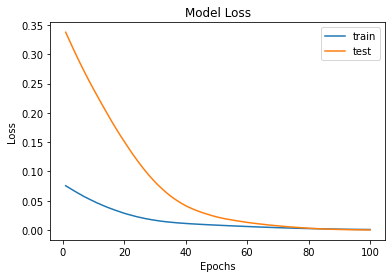

In [19]:
# Plot the Model loss

# YOUR CODE HERE
plt.plot([x+1 for x in range(100)], history.history['loss'])
plt.plot([x+1 for x in range(100)], history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

Lets look at our predictions

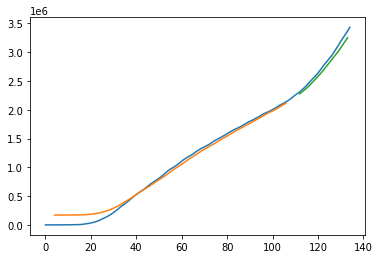

In [20]:
# Make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_train])

# Shift train predictions for plotting
trainPredictPlot = np.empty_like(US_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_steps:len(trainPredict)+time_steps, :] = trainPredict
# Shift test predictions for plotting
testPredictPlot = np.empty_like(US_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_steps*2)+1:len(US_data)-1, :] = testPredict
# Plot baseline and predictions
plt.plot(scaler.inverse_transform(US_data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

The Blue line is the real number of cases. the Orange line is the train_predicted number of cases, and the green line is the test_predicted number of cases.

#### Question 2.iii.d)
Comment on the fit of your prediction? Are there any interesting correlations between the cumulative case numbers that we plotted above and your forecast?

The fit of the prediction looks pretty accurate. I ran it a few times and sometimes the accuracy was almost exact and other times the predicted data was below the actual data for the second half of the graph. The test_predicted line is lower than the real number line however the trend looks very accurate. This also points to the fact that the rate of infection  has recently increased, which makes sense why the test data would be a little behind the actual data. 

#### Question 2.iii.e)
Re-run Question 2.iii.a to 2.iii.c but with split = 0.9. Was your prediction closer to the actual trend? Explain why or why not the prediction was closer to the real trend.

After adjusting the split to 0.9, the prediction appears to be closer to the actual trend. This can be explained by the fact that there was more training data being used and compared vs testing with a split of 0.7. 

#### Question 2.iii.f)
This time, try adjusting the parameters time_steps and choose a split to your liking. See if you can get your model to do anything else that is interesting. Explain the changes that you made.

I was able to get very accurate results by adjusting the split to 0.8 and the time_steps to 4. Increasing the number of time steps the model "looks back" seemed to increase the accuracy of the test data. However I noticed that raising this to 5 actually made it start over estimating the infection rate in certain places on the graph. 

## Question 3: Denoising Autoencoder
Now we will build a Denoising auto-encoder to denoise smiley face pictures gathered at the [SMILEsmileD](https://github.com/hromi/SMILEsmileD) archive.
<center><img src="https://people.ucsc.edu/~mbriden/cse140/smiles.png" width="300"></center>

### Question 3.i) Import and display sample images
Let us begin by getting our imports and downloading the dataset.

In [21]:
import os
import numpy as np
import zipfile
from urllib import request
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import keras
from keras.layers import Activation, Dense, Input
from keras.layers import Conv2D, Flatten
from keras.layers import Reshape, Conv2DTranspose
from keras.models import Model
from keras import backend as K
%matplotlib inline

In [22]:
# Download data
url = 'https://github.com/hromi/SMILEsmileD/archive/master.zip'
request.urlretrieve(url, 'data.zip')
zipfile.ZipFile('data.zip').extractall()

In [23]:
# Open images
x_pos = []
base_path = 'SMILEsmileD-master/SMILEs/'
positive_smiles = base_path + 'positives/positives7/'
negative_smiles = base_path + 'SMILEsmileD-master/SMILEs/negatives/negatives7/'
for img in os.listdir(positive_smiles):
    x_pos.append(mpimg.imread(positive_smiles + img))

# Change into np.array and scale to 255. which is max
x_pos = np.array(x_pos)/255.

# Reshape
x_pos = x_pos.reshape(len(x_pos),64,64,1)

# Shuffle the images in case there was some underlying order
np.random.shuffle(x_pos)

# Split into test and train set, but we will use keras built in validation_size
x_pos_train = x_pos[int(x_pos.shape[0]* .20):]
print("x_pos_train.shape:",x_pos_train.shape)
x_pos_train_noisy = x_pos_train + 0.05 * np.random.normal(loc=0., scale=1., size=x_pos_train.shape)

x_pos_test = x_pos[:int(x_pos.shape[0]* .20)]
print("x_pos_test.shape:",x_pos_test.shape)
x_pos_test_noisy = x_pos_test + 0.05 * np.random.normal(loc=0., scale=1., size=x_pos_test.shape)

x_pos_train.shape: (2952, 64, 64, 1)
x_pos_test.shape: (738, 64, 64, 1)


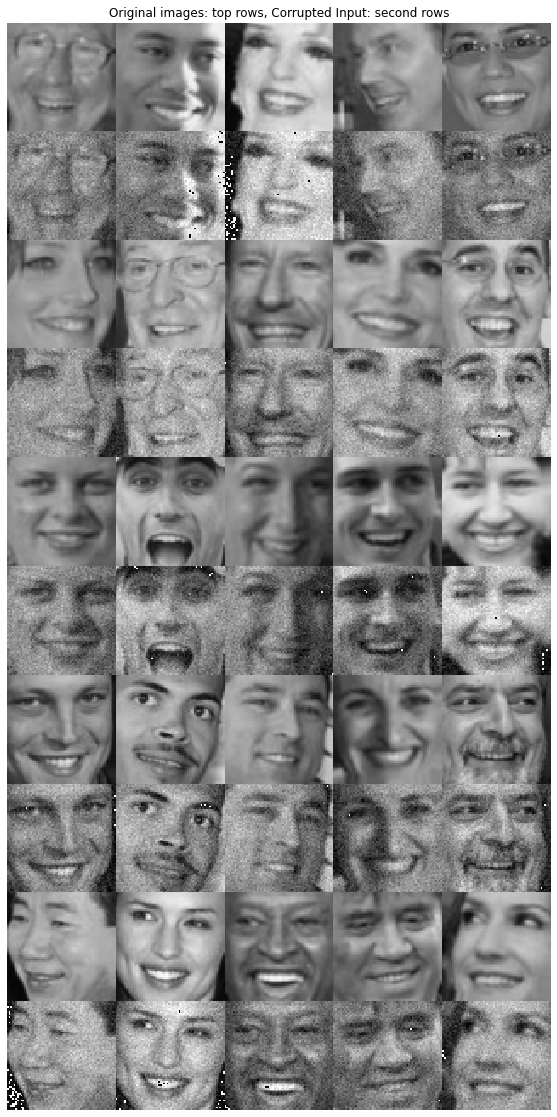

In [24]:
# Display the 1st 5 original and corrupted
image_size = 64
rows, cols = 5, 5
num = rows * cols
imgs = np.concatenate([x_pos_train[:num], x_pos_train_noisy[:num]])
imgs = imgs.reshape((rows * 2, cols, image_size, image_size))
imgs = np.vstack(np.split(imgs, rows, axis=1))
imgs = imgs.reshape((rows * 2, -1, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
imgs = (imgs * 255).astype(np.uint8)
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.title('Original images: top rows, '
          'Corrupted Input: second rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.show()

### Question 3.ii) Build the Model


#### Question 3.ii.a) Build an Encoder Model
Above are the images before and after being corrupted. Now we will build the autoencoder. Build the Encoder with the following requirements:
<ul>
<li>Input Layer shape of size (64,64,1)</li>
<li>Latent_dimension of 16</li>
<li>Use two CNN layers with two filters per layer of size 32 and 64, and kernel size of 3</li>
<li>1 dense layer of size Latent_dimension</li>
</ul>

Your model should have an input size of (64,64,1) and an output size of (None,16).

** hint: hint: refer to the last class exercise on autiencoders.

In [25]:
# Build the encoder architecture here

# YOUR CODE HERE 
# Network parameters
input_shape = (64, 64, 1)
kernel_size = 3
latent_dim = 16
# Encoder/Decoder number of CNN layers and filters per layer
layer_filters = [32, 64]

inputs = Input(shape=input_shape, name='encoder_input')
x = inputs

for filters in layer_filters:
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               strides=2,
               activation='relu',
               padding='same')(x)

shape = K.int_shape(x)

x = Flatten()(x)
latent = Dense(latent_dim, name='latent_vector')(x)

encoder = Model(inputs, latent, name='encoder')


In [26]:
# Print model summary

# YOUR CODE HERE
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
latent_vector (Dense)        (None, 16)                262160    
Total params: 280,976
Trainable params: 280,976
Non-trainable params: 0
_________________________________________________________________


#### 3.ii.b) Build an Dencoder Model
Next we will build the decoder model. This model should have
<ul>
<li>Input Layer shape of size (latent_dimension,)</li>
<li>1 dense layer with the size of 16*16*64</li>
<li>Two transposed convolution layers with two filters per layer of size 32 and 64, and kernel size of 3</li>
<li>1 conv2dTranspose layer with 1 filter and kernel size of 3</li>
<li>1 Output layer with sigmoid activation</li>
</ul>

In [27]:
# Build the decoder architecture here

# YOUR CODE HERE
# Build the Decoder Model
latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
x = Dense(shape[1] * shape[2] * shape[3])(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)

# Stack of Transposed Conv2D blocks

for filters in layer_filters[::-1]:
    x = Conv2DTranspose(filters=filters,
                        kernel_size=kernel_size,
                        strides=2,
                        activation='relu',
                        padding='same')(x)

x = Conv2DTranspose(filters=1,
                    kernel_size=kernel_size,
                    padding='same')(x)

outputs = Activation('sigmoid', name='decoder_output')(x)

# Instantiate Decoder Model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16384)             278528    
_________________________________________________________________
reshape_1 (Reshape)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 64, 64, 32)        18464     
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 64, 64, 1)         289       
_________________________________________________________________
decoder_output (Activation)  (None, 64, 64, 1)         0   

#### Question 3.ii.c) Build Encoder + Dencoder Model
Now combine encoder and decoder models and build the autoencoder architecture.

In [28]:
# Autoencoder = Encoder + Decoder
# Instantiate Autoencoder Model
# Print Model Summary

# YOUR CODE HERE
autoencoder = Model(inputs, decoder(encoder(inputs)), name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 64, 64, 1)         0         
_________________________________________________________________
encoder (Model)              (None, 16)                280976    
_________________________________________________________________
decoder (Model)              (None, 64, 64, 1)         334209    
Total params: 615,185
Trainable params: 615,185
Non-trainable params: 0
_________________________________________________________________


Call compile using 'mse' loss with an optimizer (adam is probably the safest one to use). Call autocoder.fit with x = x_pos_train_noisy, y = x_pos_train, validation_data = (x_pos_test, x_pos_test_noisy). 

In [29]:
# Compile
autoencoder.compile(loss='mse', optimizer='adam')

# Train the autoencoder
autoencoder.fit(x_pos_train_noisy,
                x_pos_train,
                validation_data=(x_pos_test, x_pos_test_noisy),
                epochs=10
                )

Train on 2952 samples, validate on 738 samples
Epoch 1/10
2952/2952 [==============================] - 3s 1ms/step - loss: 0.0223 - val_loss: 0.0158
Epoch 2/10
2952/2952 [==============================] - 1s 503us/step - loss: 0.0109 - val_loss: 0.0123
Epoch 3/10
2952/2952 [==============================] - 1s 507us/step - loss: 0.0088 - val_loss: 0.0109
Epoch 4/10
2952/2952 [==============================] - 2s 509us/step - loss: 0.0079 - val_loss: 0.0104
Epoch 5/10
2952/2952 [==============================] - 2s 512us/step - loss: 0.0074 - val_loss: 0.0099
Epoch 6/10
2952/2952 [==============================] - 1s 501us/step - loss: 0.0070 - val_loss: 0.0096
Epoch 7/10
2952/2952 [==============================] - 1s 508us/step - loss: 0.0067 - val_loss: 0.0094
Epoch 8/10
2952/2952 [==============================] - 1s 507us/step - loss: 0.0065 - val_loss: 0.0093
Epoch 9/10
2952/2952 [==============================] - 1s 505us/step - loss: 0.0064 - val_loss: 0.0092
Epoch 10/10
2952/29

### Question 3.iii) Print denoised images (predictions)

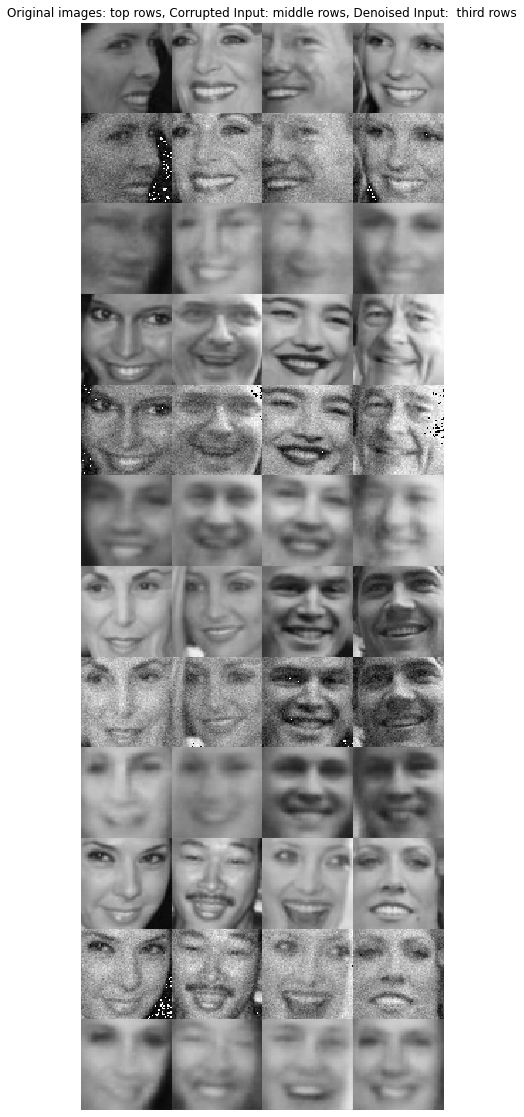

In [30]:
# Predict the Autoencoder output from corrupted test images
x_decoded = autoencoder.predict(x_pos_test_noisy)
# Display the 1st 4 corrupted and denoised images
rows, cols = 4, 4
num = rows * cols
imgs = np.concatenate([x_pos_test[:num], x_pos_test_noisy[:num], x_decoded[:num]])
imgs = imgs.reshape((rows * 3, cols, image_size, image_size))
imgs = np.vstack(np.split(imgs, rows, axis=1))
imgs = imgs.reshape((rows * 3, -1, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
imgs = (imgs * 255).astype(np.uint8)
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.title('Original images: top rows, '
          'Corrupted Input: middle rows, '
          'Denoised Input:  third rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.show()

Comment on how your model has performed. Was your model able to denoise the image successfully? Is there anything unexpected results about the images? MSE error is known to smooth an image too much, did your model suffere the same result?

The model seemed to perform ok. The autoencoder is probably a little small for the dataset. The model was able to denoise the images somewhat successfully however the images do look blurry and washed out, which I did not expect. As the question suggests, MSE error is known to smooth the image too much so this could suggest why my model looks like this. 